In [ ]:
!sudo apt-get install -y fonts-nanum #한글 폰트 설정용 
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

import os
import cv2
from glob import glob
import json

import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

import warnings
warnings.filterwarnings(action="ignore")

### train 만 불러오자

In [ ]:
from unicodedata import normalize

In [ ]:
with open('/gdrive/My Drive/AI_TW/AIMMO/test/sample_test/training_data.txt', 'rt') as file:
	f = file.readlines()

print(f)

In [ ]:
f[0].split('/')[4].replace('\n', '')

In [ ]:
train_list = []
for i in range(0, len(f)):
  train_list.append(normalize('NFC', f[i].split('/')[4].replace('\n', '')))
train_list

### 데이터 불러오기

In [ ]:
df_all = pd.read_csv('/gdrive/My Drive/AI_TW/AIMMO/data.csv', encoding="cp949")

In [ ]:
df_all

,filename,label,class_name,points,x_center,y_center,width,height
0,고삼교차로_20210422102825_0000015.jpg,일반차량,트럭,"[[1116, 624], [1282, 624], [1282, 821], [1116,...",0.624479,0.668981,0.086458,0.182407
1,고삼교차로_20210422102825_0000015.jpg,목적차량(특장차),기타 특장차,"[[1348, 512], [1465, 512], [1465, 633], [1348,...",0.732552,0.530093,0.060937,0.112037
2,고삼교차로_20210422102825_0000015.jpg,일반차량,SUV/승합차,"[[1482, 654], [1557, 654], [1557, 706], [1482,...",0.791406,0.629630,0.039062,0.048148
3,고삼교차로_20210422102825_0000015.jpg,일반차량,SUV/승합차,"[[772, 534], [831, 534], [831, 589], [772, 589]]",0.417448,0.519907,0.030729,0.050926
4,고삼교차로_20210422102825_0000015.jpg,목적차량(특장차),기타 특장차,"[[1051, 385], [1103, 385], [1103, 458], [1051,...",0.560937,0.390278,0.027083,0.067593
...,...,...,...,...,...,...,...,...
55137,팔야리입구(남양주)_20210422102825_0054875.jpg,일반차량,경차/세단,"[[258, 623], [401, 623], [401, 765], [258, 765]]",0.171615,0.642593,0.074479,0.131481
55138,팔야리입구(남양주)_20210422102825_0054875.jpg,일반차량,경차/세단,"[[232, 551], [348, 551], [348, 659], [232, 659]]",0.151042,0.560185,0.060417,0.100000
55139,팔야리입구(남양주)_20210422102825_0054875.jpg,일반차량,트럭,"[[656, 417], [746, 417], [746, 491], [656, 491]]",0.365104,0.420370,0.046875,0.068519
55140,팔야리입구(남양주)_20210422102825_0054875.jpg,일반차량,트럭,"[[253, 409], [345, 409], [345, 506], [253, 506]]",0.155729,0.423611,0.047917,0.089815


In [ ]:
df_train = df_all.loc[df_all['filename'].isin(train_list)]
df_train

,filename,label,class_name,points,x_center,y_center,width,height
0,고삼교차로_20210422102825_0000015.jpg,일반차량,트럭,"[[1116, 624], [1282, 624], [1282, 821], [1116,...",0.624479,0.668981,0.086458,0.182407
1,고삼교차로_20210422102825_0000015.jpg,목적차량(특장차),기타 특장차,"[[1348, 512], [1465, 512], [1465, 633], [1348,...",0.732552,0.530093,0.060937,0.112037
2,고삼교차로_20210422102825_0000015.jpg,일반차량,SUV/승합차,"[[1482, 654], [1557, 654], [1557, 706], [1482,...",0.791406,0.629630,0.039062,0.048148
3,고삼교차로_20210422102825_0000015.jpg,일반차량,SUV/승합차,"[[772, 534], [831, 534], [831, 589], [772, 589]]",0.417448,0.519907,0.030729,0.050926
4,고삼교차로_20210422102825_0000015.jpg,목적차량(특장차),기타 특장차,"[[1051, 385], [1103, 385], [1103, 458], [1051,...",0.560937,0.390278,0.027083,0.067593
...,...,...,...,...,...,...,...,...
55130,팔야리입구(남양주)_20210422102825_0054845.jpg,일반차량,경차/세단,"[[232, 551], [346, 551], [346, 656], [232, 656]]",0.150521,0.558796,0.059375,0.097222
55131,팔야리입구(남양주)_20210422102825_0054845.jpg,일반차량,트럭,"[[253, 410], [344, 410], [344, 503], [253, 503]]",0.155469,0.422685,0.047396,0.086111
55132,팔야리입구(남양주)_20210422102825_0054845.jpg,일반차량,트럭,"[[722, 446], [837, 446], [837, 530], [722, 530]]",0.405990,0.451852,0.059896,0.077778
55133,팔야리입구(남양주)_20210422102825_0054845.jpg,일반차량,트럭,"[[981, 521], [1204, 521], [1204, 686], [981, 6...",0.569010,0.558796,0.116146,0.152778


# 전체 데이터 분포 확인

### 간단하게 자료 확인

In [ ]:
df_all['class_name'].unique()

array(['트럭', '기타 특장차', 'SUV/승합차', '경차/세단', '오토바이', '버스(소형, 대형)', '견인차',
       '자전거 / 기타 전동 이동체', '통학버스 (소형,대형)', '성인', '경찰차'], dtype=object)

In [ ]:
df_all['class_name'].value_counts()

경차/세단              15640
기타 특장차             15499
트럭                 13523
SUV/승합차             9697
버스(소형, 대형)           488
성인                   154
오토바이                  56
자전거 / 기타 전동 이동체       44
견인차                   30
통학버스 (소형,대형)           6
경찰차                    5
Name: class_name, dtype: int64

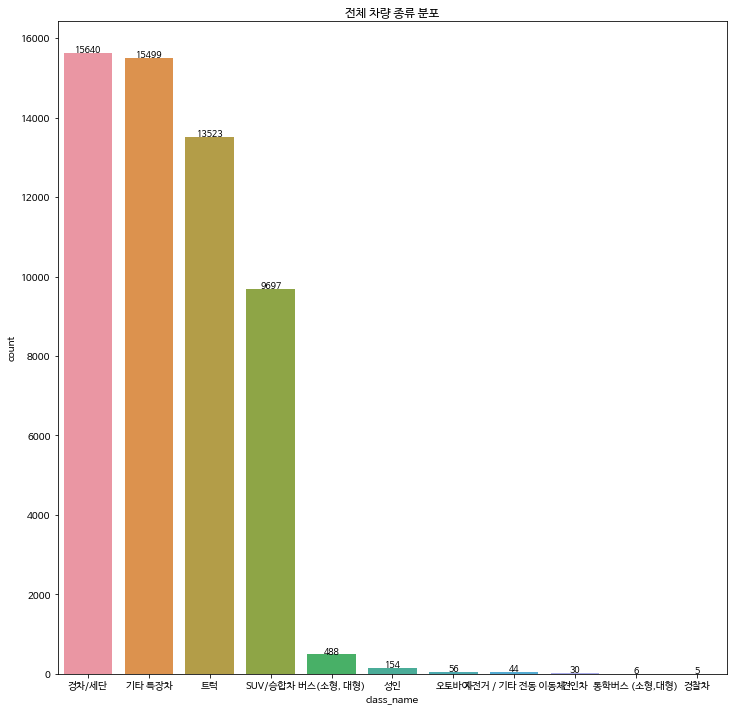

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

plt.figure(figsize=(12,12))
ax = sns.countplot(x = df_all["class_name"], order = df_all['class_name'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 10, height, ha = 'center', size = 9)

plt.title("전체 차량 종류 분포")
plt.show()

### Training Image들의 객체 분포 (현재 아래의 그림은 train 아님 전체 분포임)
- X축 : Image 800장을 포함된 객체의 빈도 순으로 정렬
- Y축 : 빈도가 높은 객체유형 순으로 정렬

In [ ]:
df_image = df_all.filename.value_counts().to_frame(name = 'obj_count')
df_image = df_image.join(df_all[['class_name','filename']].drop_duplicates()['filename'].value_counts()).rename(columns = {'filename':'obj_nunique'})
df_img2obj = df_image.join(pd.crosstab(df_all['filename'], df_all['class_name'])[df_all['class_name'].value_counts().index])
df_img2obj

,obj_count,obj_nunique,경차/세단,기타 특장차,트럭,SUV/승합차,"버스(소형, 대형)",성인,오토바이,자전거 / 기타 전동 이동체,견인차,"통학버스 (소형,대형)",경찰차
입장교차로_20210422102825_0019600.jpg,29,4,10,12,5,2,0,0,0,0,0,0,0
입장교차로_20210422102825_0019540.jpg,28,4,11,10,5,2,0,0,0,0,0,0,0
입장교차로_20210422102825_0019630.jpg,28,4,10,11,5,2,0,0,0,0,0,0,0
입장교차로_20210422102825_0019660.jpg,27,4,9,12,4,2,0,0,0,0,0,0,0
입장교차로_20210422102825_0019480.jpg,27,4,9,11,4,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
고삼교차로_20210422102825_0046721.jpg,1,1,0,1,0,0,0,0,0,0,0,0,0
고삼교차로_20210422102825_0028642.jpg,1,1,0,0,0,1,0,0,0,0,0,0,0
고삼교차로_20210422102825_0050076.jpg,1,1,0,1,0,0,0,0,0,0,0,0,0
입장교차로_20210422102825_0022559.jpg,1,1,1,0,0,0,0,0,0,0,0,0,0


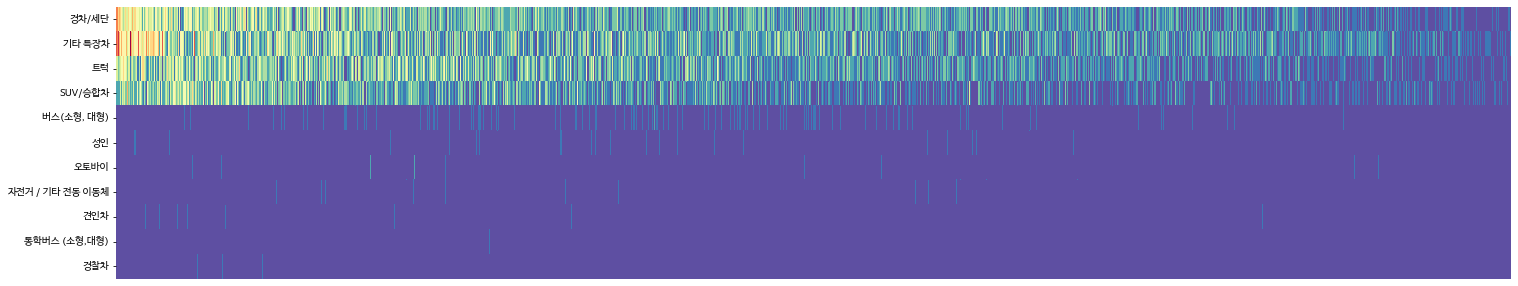

In [ ]:
plt.figure(figsize = (25,5)) # Data Augmentation이 중요한 상황
ax = sns.heatmap(df_img2obj.iloc[:,2:].transpose(), cmap='Spectral_r', cbar=False, xticklabels=False)

### 사진1장에 포함된 객체수의 분포

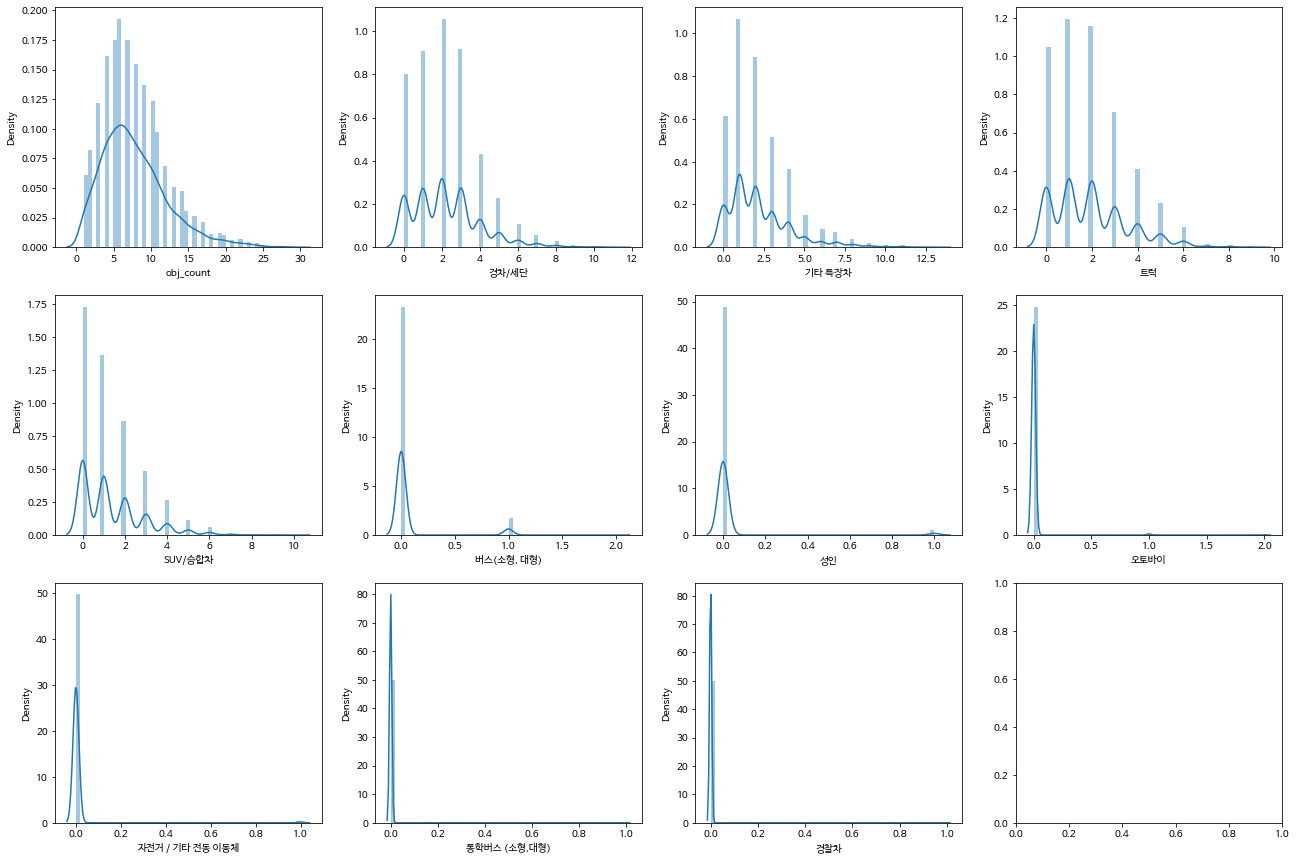

In [ ]:
fig, axs = plt.subplots(3,4, figsize = (22,15))  #사진1장에 포함된 객체수의 분포

sns.distplot(df_img2obj['obj_count'], ax=axs[0][0])
sns.distplot(df_img2obj['경차/세단'], ax=axs[0][1])
sns.distplot(df_img2obj['기타 특장차'], ax=axs[0][2])
sns.distplot(df_img2obj['트럭'], ax=axs[0][3])

sns.distplot(df_img2obj['SUV/승합차'], ax=axs[1][0])
sns.distplot(df_img2obj['버스(소형, 대형)'], ax=axs[1][1])
sns.distplot(df_img2obj['성인'], ax=axs[1][2])
sns.distplot(df_img2obj['오토바이'], ax=axs[1][3])

sns.distplot(df_img2obj['자전거 / 기타 전동 이동체'], ax=axs[2][0])
sns.distplot(df_img2obj['통학버스 (소형,대형)'], ax=axs[2][1])
sns.distplot(df_img2obj['경찰차'], ax=axs[2][2])


plt.show()

### Image에 포함된 고유한 객체유형 수 

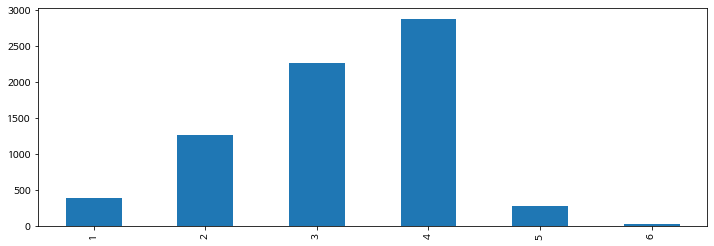

In [ ]:
df_img2obj['obj_nunique'].value_counts().sort_index().plot.bar(figsize=(12,4)) #Image에 포함된 고유한 객체유형 수 
plt.show()

### 객체유형별 전체 객체수(obj_count), 객체를 포함하는 이미지수(image_count)

In [ ]:
df_object = df_all.class_name.value_counts().to_frame(name = 'obj_count')
df_object = df_object.join(df_all[['class_name','filename']].drop_duplicates()['class_name'].value_counts()).rename(columns = {'class_name':'image_count'})
df_object

,obj_count,image_count
경차/세단,15640,5841
기타 특장차,15499,5960
트럭,13523,5572
SUV/승합차,9697,4590
"버스(소형, 대형)",488,483
성인,154,154
오토바이,56,47
자전거 / 기타 전동 이동체,44,44
견인차,30,30
"통학버스 (소형,대형)",6,6


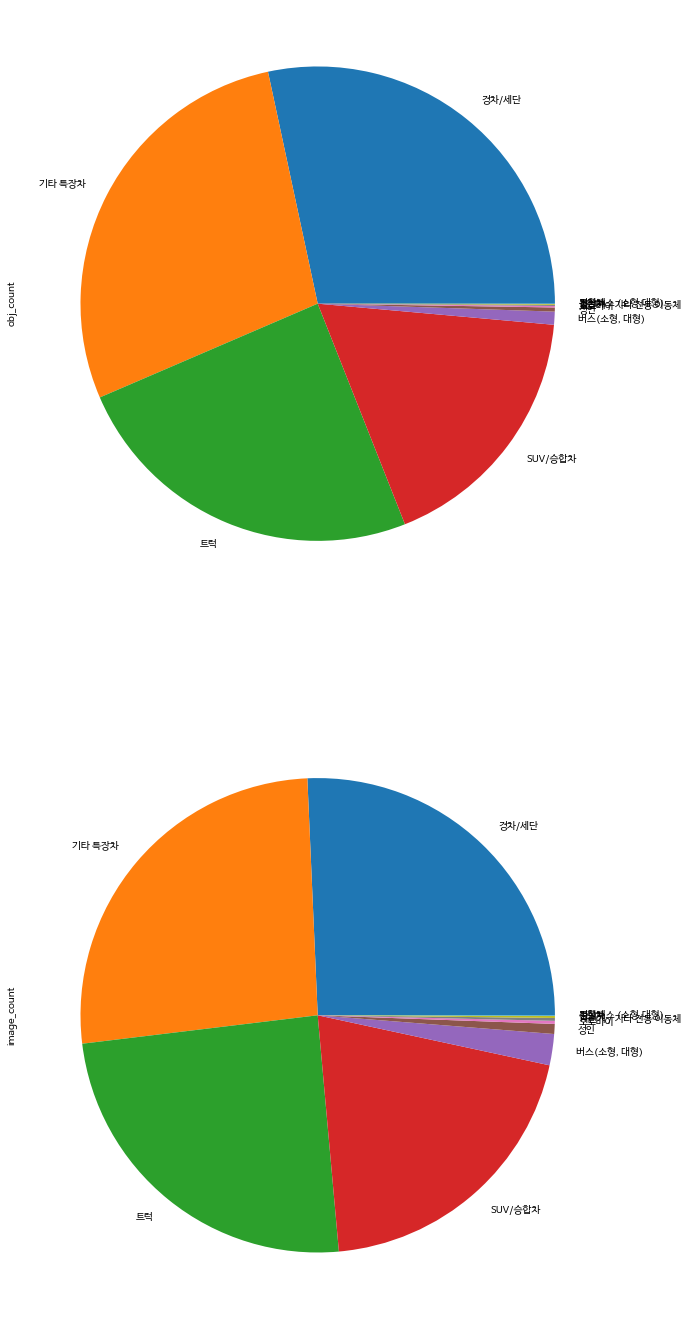

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(12, 24)) # 객체유형별 전체 객체수(obj_count), 객체를 포함하는 이미지수(image_count)
df_object['obj_count'].plot.pie(ax=axs[0])
df_object['image_count'].plot.pie(ax=axs[1])

### 위치 정보 데이터 시각화

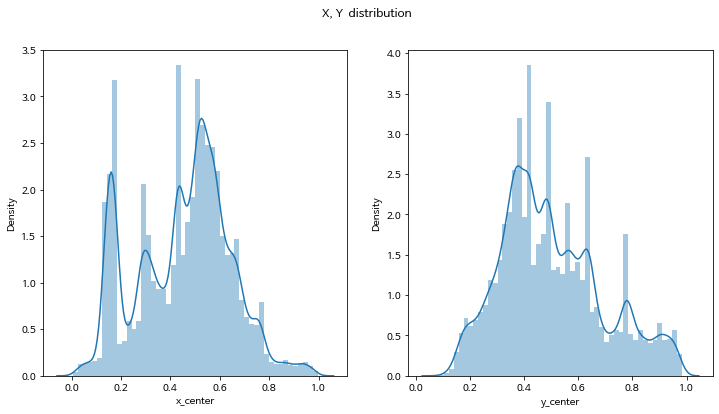

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.distplot(df_all.x_center, ax = ax[0])
sns.distplot(df_all.y_center, ax = ax[1])
plt.suptitle('X, Y  distribution')
plt.show()

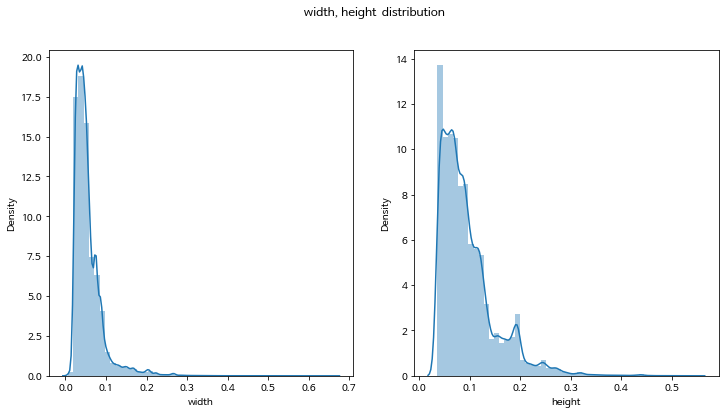

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.distplot(df_all.width, ax = ax[0])
sns.distplot(df_all.height, ax = ax[1])
plt.suptitle(' width, height  distribution')
plt.show()

# train_data 분포 확인
- 실제 생각해야할 부분

### 간단하게 자료 확인

In [ ]:
df_train['class_name'].unique()

array(['트럭', '기타 특장차', 'SUV/승합차', '경차/세단', '오토바이', '버스(소형, 대형)', '견인차',
       '자전거 / 기타 전동 이동체', '통학버스 (소형,대형)', '성인', '경찰차'], dtype=object)

In [ ]:
df_train['class_name'].value_counts()

기타 특장차             13096
경차/세단              11006
트럭                  9731
SUV/승합차             7846
버스(소형, 대형)           389
성인                   124
오토바이                  46
자전거 / 기타 전동 이동체       36
견인차                   24
통학버스 (소형,대형)           5
경찰차                    4
Name: class_name, dtype: int64

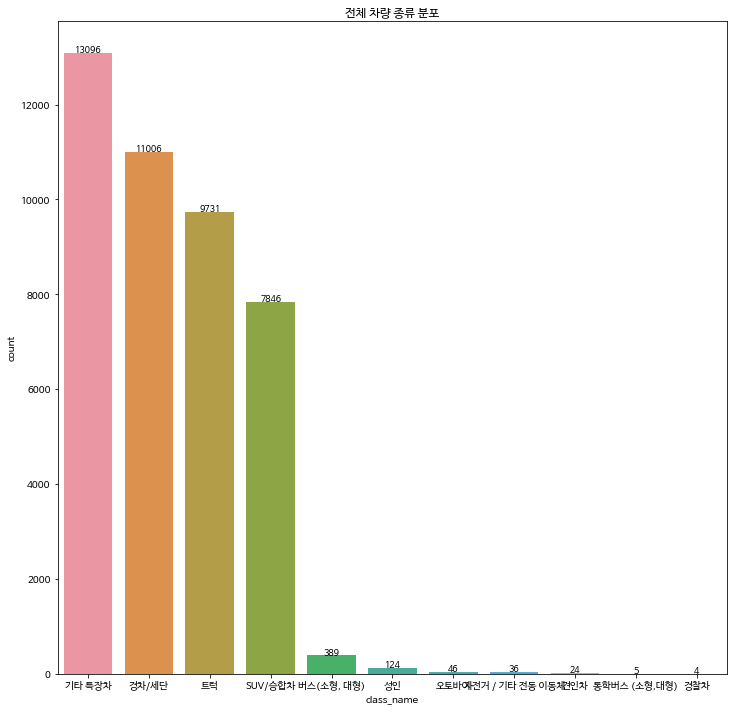

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

plt.figure(figsize=(12,12))
ax = sns.countplot(x = df_train["class_name"], order = df_train['class_name'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 10, height, ha = 'center', size = 9)

plt.title("전체 차량 종류 분포")
plt.show()

### Training Image들의 객체 분포 (현재 아래의 그림은 train 분포임)
- X축 : Image 800장을 포함된 객체의 빈도 순으로 정렬
- Y축 : 빈도가 높은 객체유형 순으로 정렬

In [ ]:
df_image = df_train.filename.value_counts().to_frame(name = 'obj_count')
df_image = df_image.join(df_train[['class_name','filename']].drop_duplicates()['filename'].value_counts()).rename(columns = {'filename':'obj_nunique'})
df_img2obj = df_image.join(pd.crosstab(df_train['filename'], df_train['class_name'])[df_train['class_name'].value_counts().index])
df_img2obj

,obj_count,obj_nunique,기타 특장차,경차/세단,트럭,SUV/승합차,"버스(소형, 대형)",성인,오토바이,자전거 / 기타 전동 이동체,견인차,"통학버스 (소형,대형)",경찰차
입장교차로_20210422102825_0019630.jpg,28,4,11,10,5,2,0,0,0,0,0,0,0
입장교차로_20210422102825_0019540.jpg,28,4,10,11,5,2,0,0,0,0,0,0,0
입장교차로_20210422102825_0019510.jpg,27,4,11,10,5,1,0,0,0,0,0,0,0
입장교차로_20210422102825_0019660.jpg,27,4,12,9,4,2,0,0,0,0,0,0,0
입장교차로_20210422102825_0019390.jpg,27,4,10,10,5,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
고삼교차로_20210422102825_0012522.jpg,1,1,0,0,0,1,0,0,0,0,0,0,0
고삼교차로_20210422102825_0007792.jpg,1,1,1,0,0,0,0,0,0,0,0,0,0
고삼교차로_20210422102825_0032325.jpg,1,1,0,0,1,0,0,0,0,0,0,0,0
고삼교차로_20210422102825_0001507.jpg,1,1,1,0,0,0,0,0,0,0,0,0,0


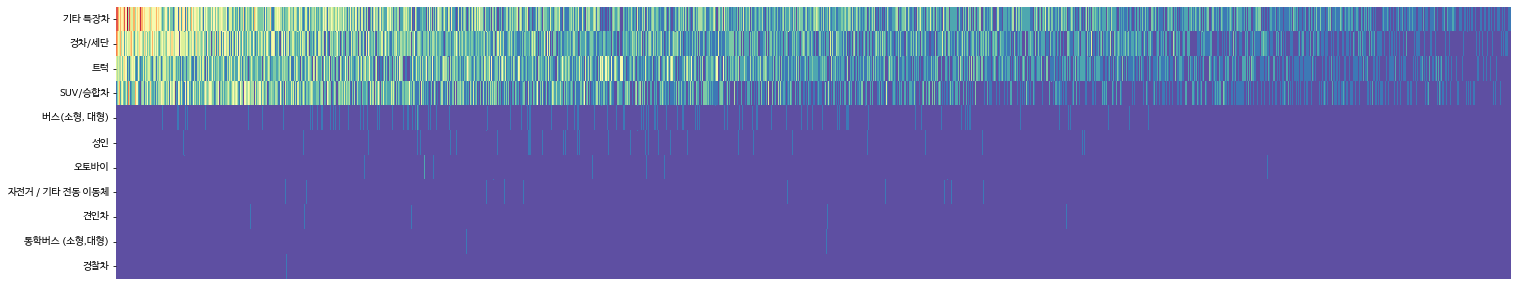

In [ ]:
plt.figure(figsize = (25,5)) # Data Augmentation이 중요한 상황
ax = sns.heatmap(df_img2obj.iloc[:,2:].transpose(), cmap='Spectral_r', cbar=False, xticklabels=False)

### 사진1장에 포함된 객체수의 분포

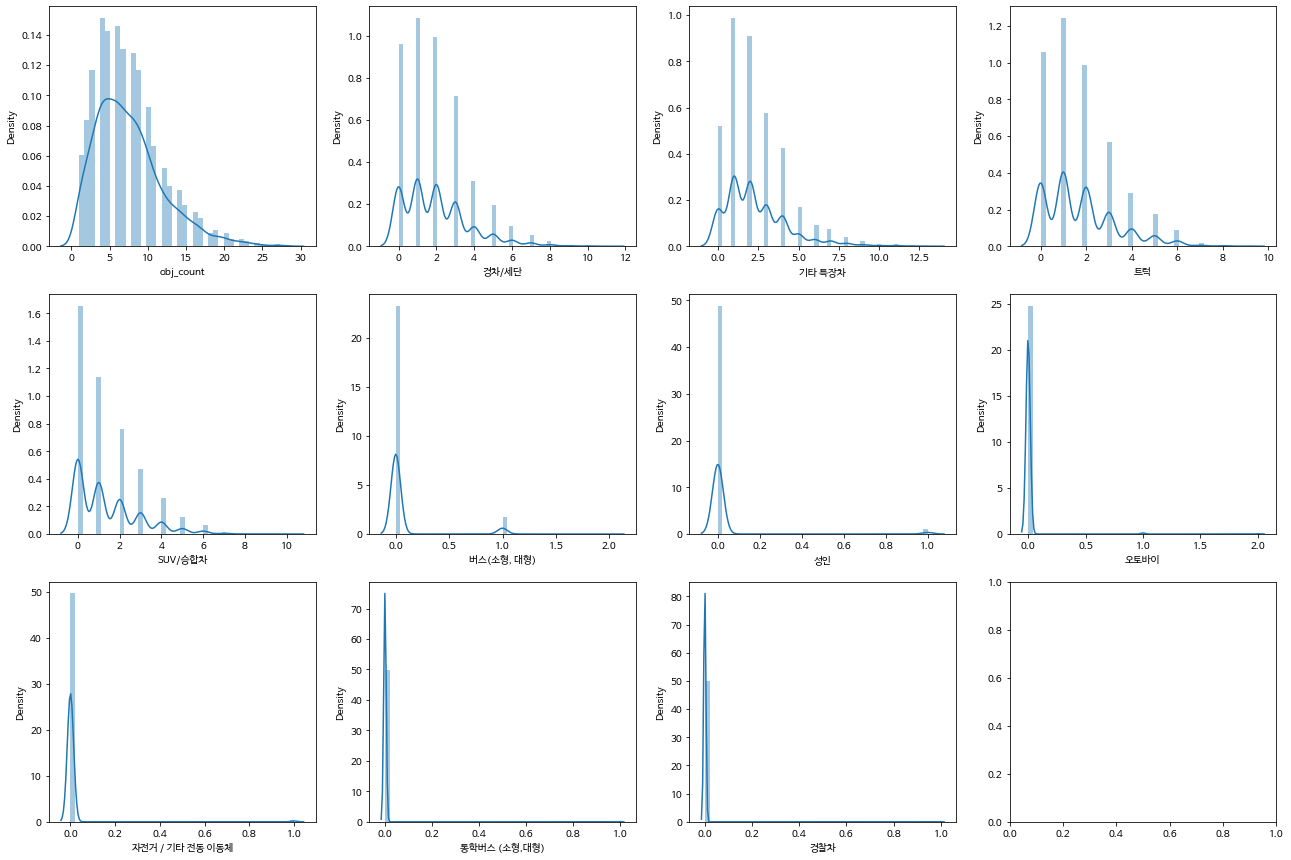

In [ ]:
fig, axs = plt.subplots(3,4, figsize = (22,15))  #사진1장에 포함된 객체수의 분포

sns.distplot(df_img2obj['obj_count'], ax=axs[0][0])
sns.distplot(df_img2obj['경차/세단'], ax=axs[0][1])
sns.distplot(df_img2obj['기타 특장차'], ax=axs[0][2])
sns.distplot(df_img2obj['트럭'], ax=axs[0][3])

sns.distplot(df_img2obj['SUV/승합차'], ax=axs[1][0])
sns.distplot(df_img2obj['버스(소형, 대형)'], ax=axs[1][1])
sns.distplot(df_img2obj['성인'], ax=axs[1][2])
sns.distplot(df_img2obj['오토바이'], ax=axs[1][3])

sns.distplot(df_img2obj['자전거 / 기타 전동 이동체'], ax=axs[2][0])
sns.distplot(df_img2obj['통학버스 (소형,대형)'], ax=axs[2][1])
sns.distplot(df_img2obj['경찰차'], ax=axs[2][2])


plt.show()

### Image에 포함된 고유한 객체유형 수 

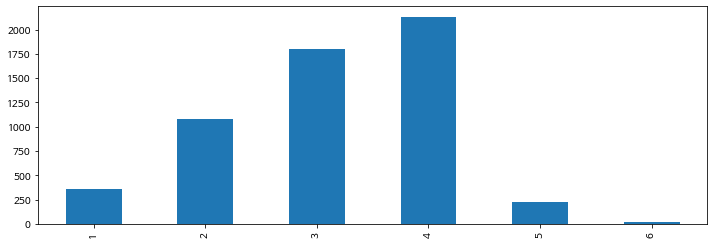

In [ ]:
df_img2obj['obj_nunique'].value_counts().sort_index().plot.bar(figsize=(12,4)) #Image에 포함된 고유한 객체유형 수 
plt.show()

### 객체유형별 전체 객체수(obj_count), 객체를 포함하는 이미지수(image_count)

In [ ]:
df_object = df_train.class_name.value_counts().to_frame(name = 'obj_count')
df_object = df_object.join(df_train[['class_name','filename']].drop_duplicates()['class_name'].value_counts()).rename(columns = {'class_name':'image_count'})
df_object

,obj_count,image_count
기타 특장차,13096,4856
경차/세단,11006,4403
트럭,9731,4276
SUV/승합차,7846,3551
"버스(소형, 대형)",389,385
성인,124,124
오토바이,46,38
자전거 / 기타 전동 이동체,36,36
견인차,24,24
"통학버스 (소형,대형)",5,5


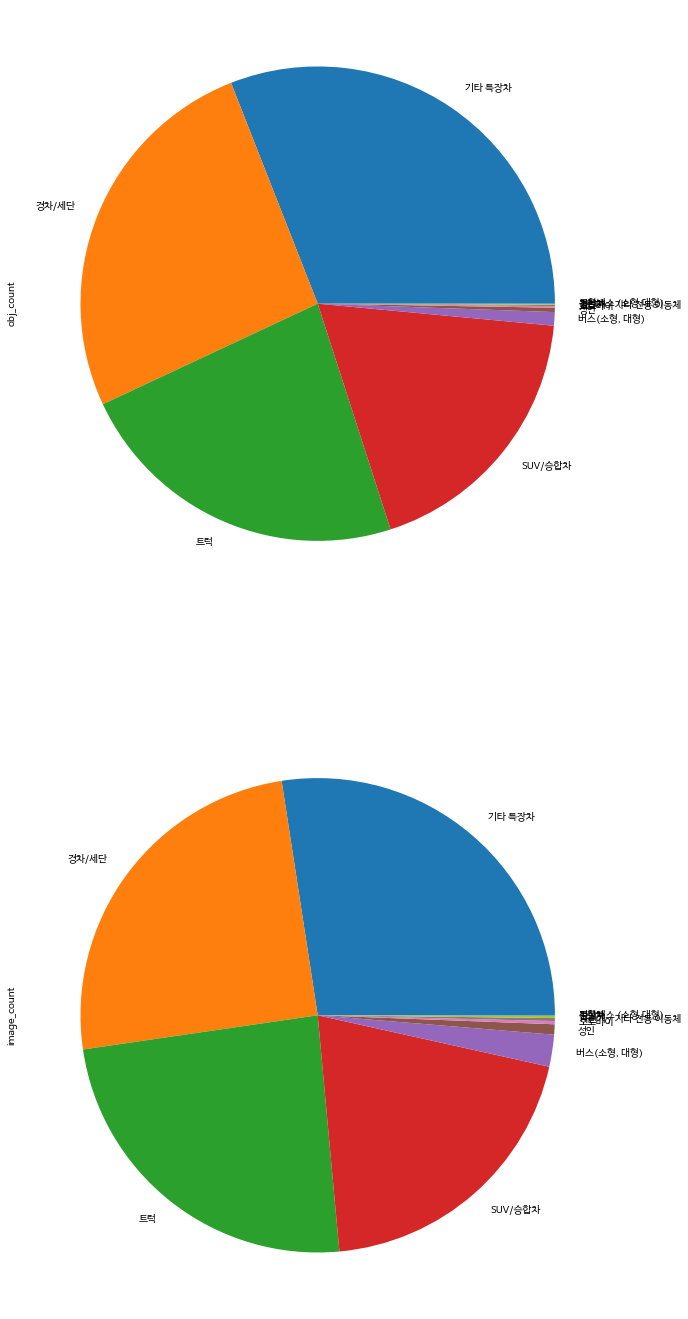

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(12, 24)) # 객체유형별 전체 객체수(obj_count), 객체를 포함하는 이미지수(image_count)
df_object['obj_count'].plot.pie(ax=axs[0])
df_object['image_count'].plot.pie(ax=axs[1])

### 위치 정보 데이터 시각화

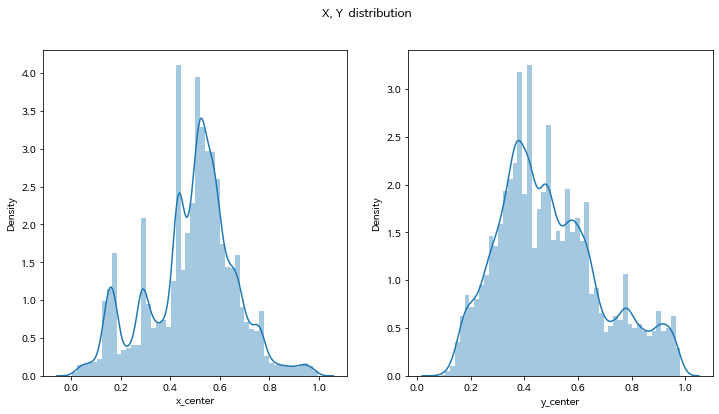

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.distplot(df_train.x_center, ax = ax[0])
sns.distplot(df_train.y_center, ax = ax[1])
plt.suptitle('X, Y  distribution')
plt.show()

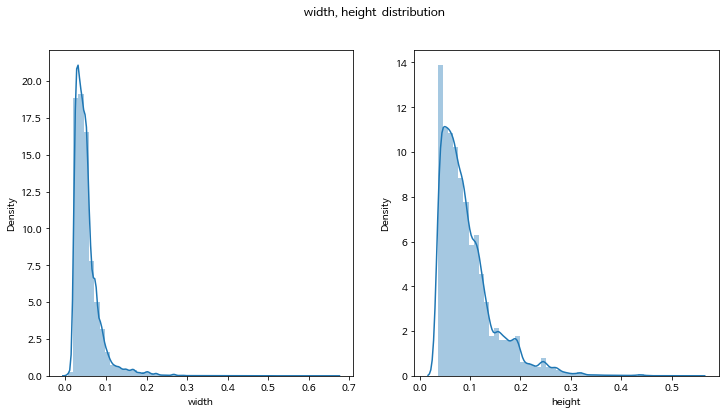

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.distplot(df_train.width, ax = ax[0])
sns.distplot(df_train.height, ax = ax[1])
plt.suptitle(' width, height  distribution')
plt.show()